# 경기도 고양시_주정차위반단속위치현황

In [2]:
import pandas as pd
import numpy as np

In [3]:
badcar = pd.read_csv('C:/Users/chaey/anaconda3/envs/myvirtual1/01VS/경기도 고양시_주정차위반단속위치현황_20240604.csv',encoding='cp949')
badcar
# C:/ex/data/경기도 고양시_주정차위반단속위치현황_20240604.csv
# C:/Users/chaey/anaconda3/envs/myvirtual1/01VS/경기도 고양시_주정차위반단속위치현황_20240604.csv

,집계년도,시군명,시군코드,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자
0,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:15,향동로,PDA,2024-06-04
1,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:25,향동로,PDA,2024-06-04
2,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:27,향동로,PDA,2024-06-04
3,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:12,향동로,PDA,2024-06-04
4,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:14,향동로,PDA,2024-06-04
...,...,...,...,...,...,...,...,...
234744,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:19,SP-7518 우리은행 일산중앙지점 앞,고정형CCTV,2024-06-04
234745,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:23,2033번지 소화전주변,시민신고웹,2024-06-04
234746,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:39,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04
234747,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:44,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04


In [4]:
badcar['관리기관명'].unique()

array(['고양시 덕양구청', '고양시 일산동구청', '고양시 일산서구청'], dtype=object)

In [5]:
badcar['관리기관명'].value_counts()
# 덕양구 165.5 km²
# 일산동구 	59.1km2
# 일산서구 42.6 km2

관리기관명
고양시 덕양구청     100636
고양시 일산동구청     76811
고양시 일산서구청     57302
Name: count, dtype: int64

In [6]:
# 면적/단속현황 수
print(165.5/100636)
print(59.1/76811)
print(42.6/57302)

0.0016445407210143488
0.0007694210464646991
0.0007434295487068514


In [7]:
# 24시간을 3시간씩 구간으로 나누어본다
badcar['단속일시정보'].value_counts

<bound method IndexOpsMixin.value_counts of 0          2022-02-23 15:15
1          2022-02-18 15:25
2          2022-02-18 15:27
3          2022-02-23 15:12
4          2022-02-23 15:14
                ...        
234744     2022-12-31 17:19
234745     2022-12-31 17:23
234746     2022-12-31 17:39
234747     2022-12-31 17:44
234748     2022-12-31 23:06
Name: 단속일시정보, Length: 234749, dtype: object>

In [8]:
timevalue = badcar['단속일시정보'].values
timevalue

array([' 2022-02-23 15:15', ' 2022-02-18 15:25', ' 2022-02-18 15:27', ...,
       ' 2022-12-31 17:39', ' 2022-12-31 17:44', ' 2022-12-31 23:06'],
      dtype=object)

In [9]:
badcar['단속일시정보'] = pd.to_datetime(badcar['단속일시정보'])

In [10]:
badcar['weekday'] = badcar['단속일시정보'].dt.strftime('%A')

In [11]:
badcar.insert(badcar.columns.get_loc('단속일시정보') + 1, '요일', badcar.pop('weekday'))
# 'horsepower' 옆에 'category' 칼럼을 삽입

In [12]:
badcar

,집계년도,시군명,시군코드,관리기관명,단속일시정보,요일,단속장소,단속방법,데이터기준일자
0,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:15:00,Wednesday,향동로,PDA,2024-06-04
1,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:25:00,Friday,향동로,PDA,2024-06-04
2,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:27:00,Friday,향동로,PDA,2024-06-04
3,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:12:00,Wednesday,향동로,PDA,2024-06-04
4,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:14:00,Wednesday,향동로,PDA,2024-06-04
...,...,...,...,...,...,...,...,...,...
234744,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:19:00,Saturday,SP-7518 우리은행 일산중앙지점 앞,고정형CCTV,2024-06-04
234745,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:23:00,Saturday,2033번지 소화전주변,시민신고웹,2024-06-04
234746,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:39:00,Saturday,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04
234747,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:44:00,Saturday,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04


In [13]:
cartime = pd.DataFrame({'datetime':pd.to_datetime(timevalue)})
cartime

,datetime
0,2022-02-23 15:15:00
1,2022-02-18 15:25:00
2,2022-02-18 15:27:00
3,2022-02-23 15:12:00
4,2022-02-23 15:14:00
...,...
234744,2022-12-31 17:19:00
234745,2022-12-31 17:23:00
234746,2022-12-31 17:39:00
234747,2022-12-31 17:44:00


In [14]:
def categorize_time(time):
    hour = time.hour
    if 0 <= hour < 6:
        return '새벽'
    elif 6 <= hour < 12:
        return '오전'
    elif 12 <= hour < 18:
        return '오후'
    else:
        return '저녁'

In [15]:
cartime['time_category'] = cartime['datetime'].apply(categorize_time)
cartime

,datetime,time_category
0,2022-02-23 15:15:00,오후
1,2022-02-18 15:25:00,오후
2,2022-02-18 15:27:00,오후
3,2022-02-23 15:12:00,오후
4,2022-02-23 15:14:00,오후
...,...,...
234744,2022-12-31 17:19:00,오후
234745,2022-12-31 17:23:00,오후
234746,2022-12-31 17:39:00,오후
234747,2022-12-31 17:44:00,오후


In [16]:
cartime['time_category'].value_counts()

time_category
오후    123524
오전     61233
저녁     48534
새벽      1458
Name: count, dtype: int64

In [17]:
# 구간을 나눈 칼럼을 원본에 추가한다
target_col = '요일'
insert_position = badcar.columns.get_loc(target_col)+1

badcar.insert(insert_position,'시간대',cartime['time_category'])

In [18]:
badcar

,집계년도,시군명,시군코드,관리기관명,단속일시정보,요일,시간대,단속장소,단속방법,데이터기준일자
0,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:15:00,Wednesday,오후,향동로,PDA,2024-06-04
1,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:25:00,Friday,오후,향동로,PDA,2024-06-04
2,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:27:00,Friday,오후,향동로,PDA,2024-06-04
3,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:12:00,Wednesday,오후,향동로,PDA,2024-06-04
4,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:14:00,Wednesday,오후,향동로,PDA,2024-06-04
...,...,...,...,...,...,...,...,...,...,...
234744,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:19:00,Saturday,오후,SP-7518 우리은행 일산중앙지점 앞,고정형CCTV,2024-06-04
234745,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:23:00,Saturday,오후,2033번지 소화전주변,시민신고웹,2024-06-04
234746,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:39:00,Saturday,오후,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04
234747,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:44:00,Saturday,오후,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04


In [19]:
# 요일과 시간대의 데이터를 합한 칼럼을 생성한다
badcar['요일_시간대'] = badcar['요일']+'_'+badcar['시간대']

In [20]:
badcar

,집계년도,시군명,시군코드,관리기관명,단속일시정보,요일,시간대,단속장소,단속방법,데이터기준일자,요일_시간대
0,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:15:00,Wednesday,오후,향동로,PDA,2024-06-04,Wednesday_오후
1,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:25:00,Friday,오후,향동로,PDA,2024-06-04,Friday_오후
2,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:27:00,Friday,오후,향동로,PDA,2024-06-04,Friday_오후
3,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:12:00,Wednesday,오후,향동로,PDA,2024-06-04,Wednesday_오후
4,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:14:00,Wednesday,오후,향동로,PDA,2024-06-04,Wednesday_오후
...,...,...,...,...,...,...,...,...,...,...,...
234744,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:19:00,Saturday,오후,SP-7518 우리은행 일산중앙지점 앞,고정형CCTV,2024-06-04,Saturday_오후
234745,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:23:00,Saturday,오후,2033번지 소화전주변,시민신고웹,2024-06-04,Saturday_오후
234746,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:39:00,Saturday,오후,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04,Saturday_오후
234747,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:44:00,Saturday,오후,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04,Saturday_오후


In [21]:
colmove = '요일_시간대'
targetcol = '단속일시정보'

timecol = badcar.pop(colmove)

targetloc = badcar.columns.get_loc(targetcol)

badcar.insert(targetloc+1,colmove,timecol)

In [22]:
badcar

,집계년도,시군명,시군코드,관리기관명,단속일시정보,요일_시간대,요일,시간대,단속장소,단속방법,데이터기준일자
0,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:15:00,Wednesday_오후,Wednesday,오후,향동로,PDA,2024-06-04
1,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:25:00,Friday_오후,Friday,오후,향동로,PDA,2024-06-04
2,2022,고양시,41280,고양시 덕양구청,2022-02-18 15:27:00,Friday_오후,Friday,오후,향동로,PDA,2024-06-04
3,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:12:00,Wednesday_오후,Wednesday,오후,향동로,PDA,2024-06-04
4,2022,고양시,41280,고양시 덕양구청,2022-02-23 15:14:00,Wednesday_오후,Wednesday,오후,향동로,PDA,2024-06-04
...,...,...,...,...,...,...,...,...,...,...,...
234744,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:19:00,Saturday_오후,Saturday,오후,SP-7518 우리은행 일산중앙지점 앞,고정형CCTV,2024-06-04
234745,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:23:00,Saturday_오후,Saturday,오후,2033번지 소화전주변,시민신고웹,2024-06-04
234746,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:39:00,Saturday_오후,Saturday,오후,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04
234747,2022,고양시,41280,고양시 일산서구청,2022-12-31 17:44:00,Saturday_오후,Saturday,오후,P-7527 주엽119안전센터 후문,고정형CCTV,2024-06-04


In [23]:
badcar['요일_시간대'].value_counts()

요일_시간대
Sunday_오후       23445
Saturday_오후     20060
Friday_오후       16247
Wednesday_오후    16185
Tuesday_오후      15970
Monday_오후       15815
Thursday_오후     15802
Friday_저녁       10770
Monday_오전       10410
Friday_오전       10199
Thursday_오전     10061
Wednesday_오전     9922
Tuesday_오전       9793
Wednesday_저녁     9342
Thursday_저녁      8967
Tuesday_저녁       8474
Monday_저녁        7944
Sunday_오전        5563
Saturday_오전      5285
Saturday_저녁      1716
Sunday_저녁        1321
Sunday_새벽         298
Saturday_새벽       270
Friday_새벽         197
Thursday_새벽       188
Monday_새벽         173
Wednesday_새벽      167
Tuesday_새벽        165
Name: count, dtype: int64

In [24]:
len(badcar['요일_시간대'].value_counts())
# 하루를 4개의 시간대로 나누고 이것을 총 7개의 요일에 적용함
# 고로 7*4=28

28

## 의문점

지역별로 나눠 보면 시간정보의 순위가 동일할까

In [25]:
# 관리기관명
# 고양시 덕양구청     100636
# 고양시 일산동구청     76811
# 고양시 일산서구청     57302

# 특정 값의 데이터만 필터링한다
filtered1 = badcar[badcar['관리기관명'] == '고양시 덕양구청']
filtered2 = badcar[badcar['관리기관명'] == '고양시 일산동구청']
filtered3 = badcar[badcar['관리기관명'] == '고양시 일산서구청']

In [26]:
filtered1['요일_시간대'].value_counts().head()
# 덕양구

요일_시간대
Sunday_오후       7591
Wednesday_오후    7550
Friday_오후       7387
Monday_오후       7383
Saturday_오후     7349
Name: count, dtype: int64

In [27]:
filtered2['요일_시간대'].value_counts().head()
# 일산동구

요일_시간대
Sunday_오후       10469
Saturday_오후      7836
Friday_오후        4946
Tuesday_오후       4904
Wednesday_오후     4851
Name: count, dtype: int64

In [28]:
filtered3['요일_시간대'].value_counts().head()
# 일산서구

요일_시간대
Sunday_오후      5385
Saturday_오후    4875
Thursday_오후    3968
Friday_오후      3914
Monday_오후      3845
Name: count, dtype: int64

## 의문점

지역별로 나눠 보면 시간정보의 순위가 동일할까

=> 동일하지 않고 지역별로 다르다

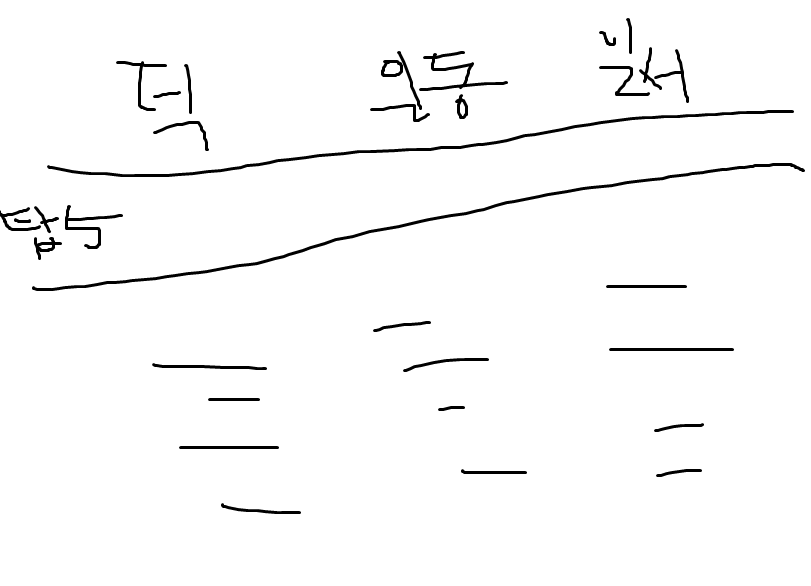

In [32]:
data = {
    '덕양구청': [i for i in filtered1['요일_시간대'].value_counts().head()],
    '일산동구청': [i for i in filtered2['요일_시간대'].value_counts().head()],
    '일산서구청': [i for i in filtered3['요일_시간대'].value_counts().head()]
}

In [33]:
timestampdf = pd.DataFrame(data)
timestampdf

,덕양구청,일산동구청,일산서구청
0,7591,10469,5385
1,7550,7836,4875
2,7387,4946,3968
3,7383,4904,3914
4,7349,4851,3845


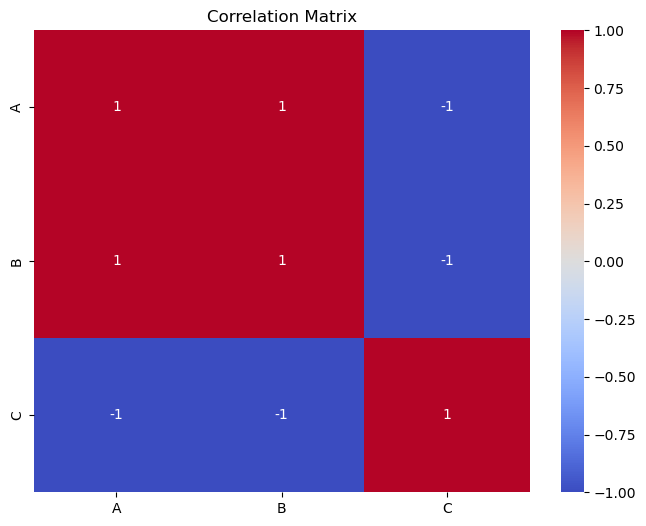

In [35]:
# 지피티 선생-히트맵을 통한 상관계수 행렬의 시각화

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 8, 10],
    'C': [5, 4, 3, 2, 1]
}

df = pd.DataFrame(data)

# 상관계수 계산
correlation_matrix = df.corr()

# 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

>히트 맵 heat map

열을 뜻하는 히트(heat)와 지도를 뜻하는 맵(map)을 결합시킨 단어

색상으로 표현할 수 있는 다양한 정보를 일정한 이미지위에 열분포 형태의 비쥬얼한 그래픽으로 출력하는 것이 특징이다

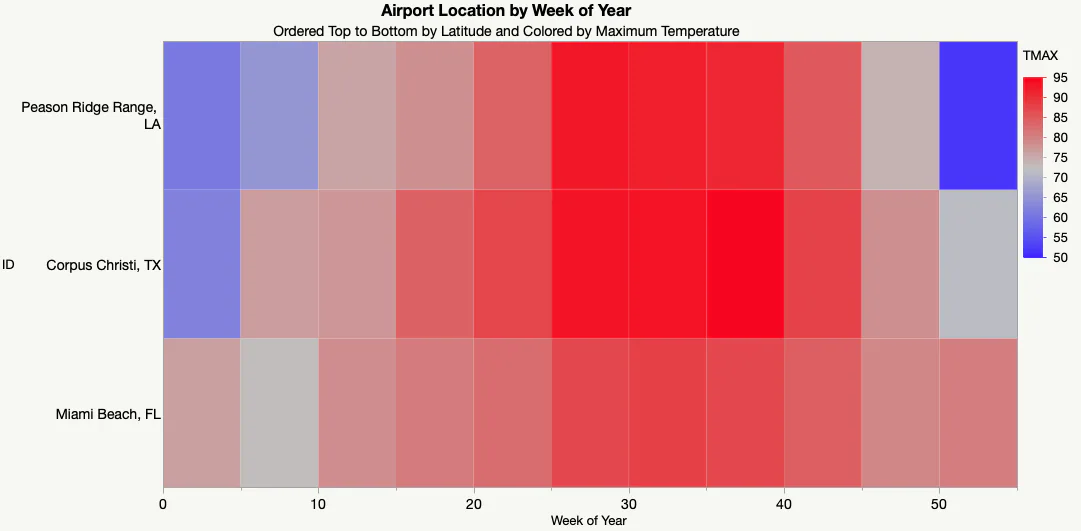

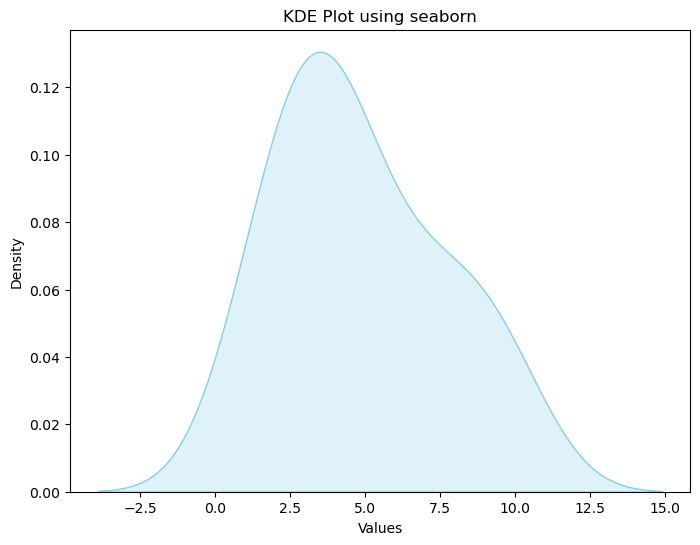

In [37]:
# 지피티 선생-커널 밀도 추정 플롯

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터
data = {
    'values': [1, 2, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10]
}
df = pd.DataFrame(data)

# KDE 플롯 생성
plt.figure(figsize=(8, 6))
sns.kdeplot(df['values'], fill=True, color='skyblue')
plt.title('KDE Plot using seaborn')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()


> 커널 밀도 추정 kde

Kernel density estimation, KDE

통계학에서 확률 밀도 추정을 위해 커널 평활화를 적용한 것

즉, 커널을 가중치로 기반으로 랜덤 변수의 확률 밀도 함수를 추정하는 비모수적 방법이다

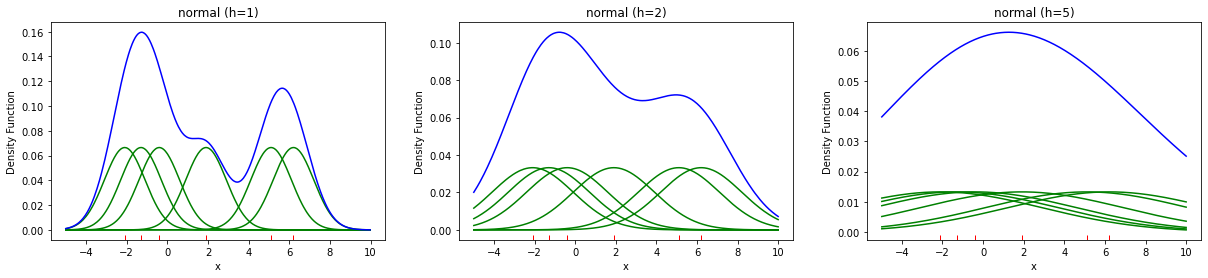

## 의문점
1. 왜 덕양구만 2순위가 수요일 오후인가

2. 왜 덕양구는 탑5의 수치가 7천대로 비슷한가

3. 일산동구가 덕양구보다 전체 적발건수가 적은데
왜 일요일 오후만 보면 일산동구의 수치가 압도적으로 더 큰가